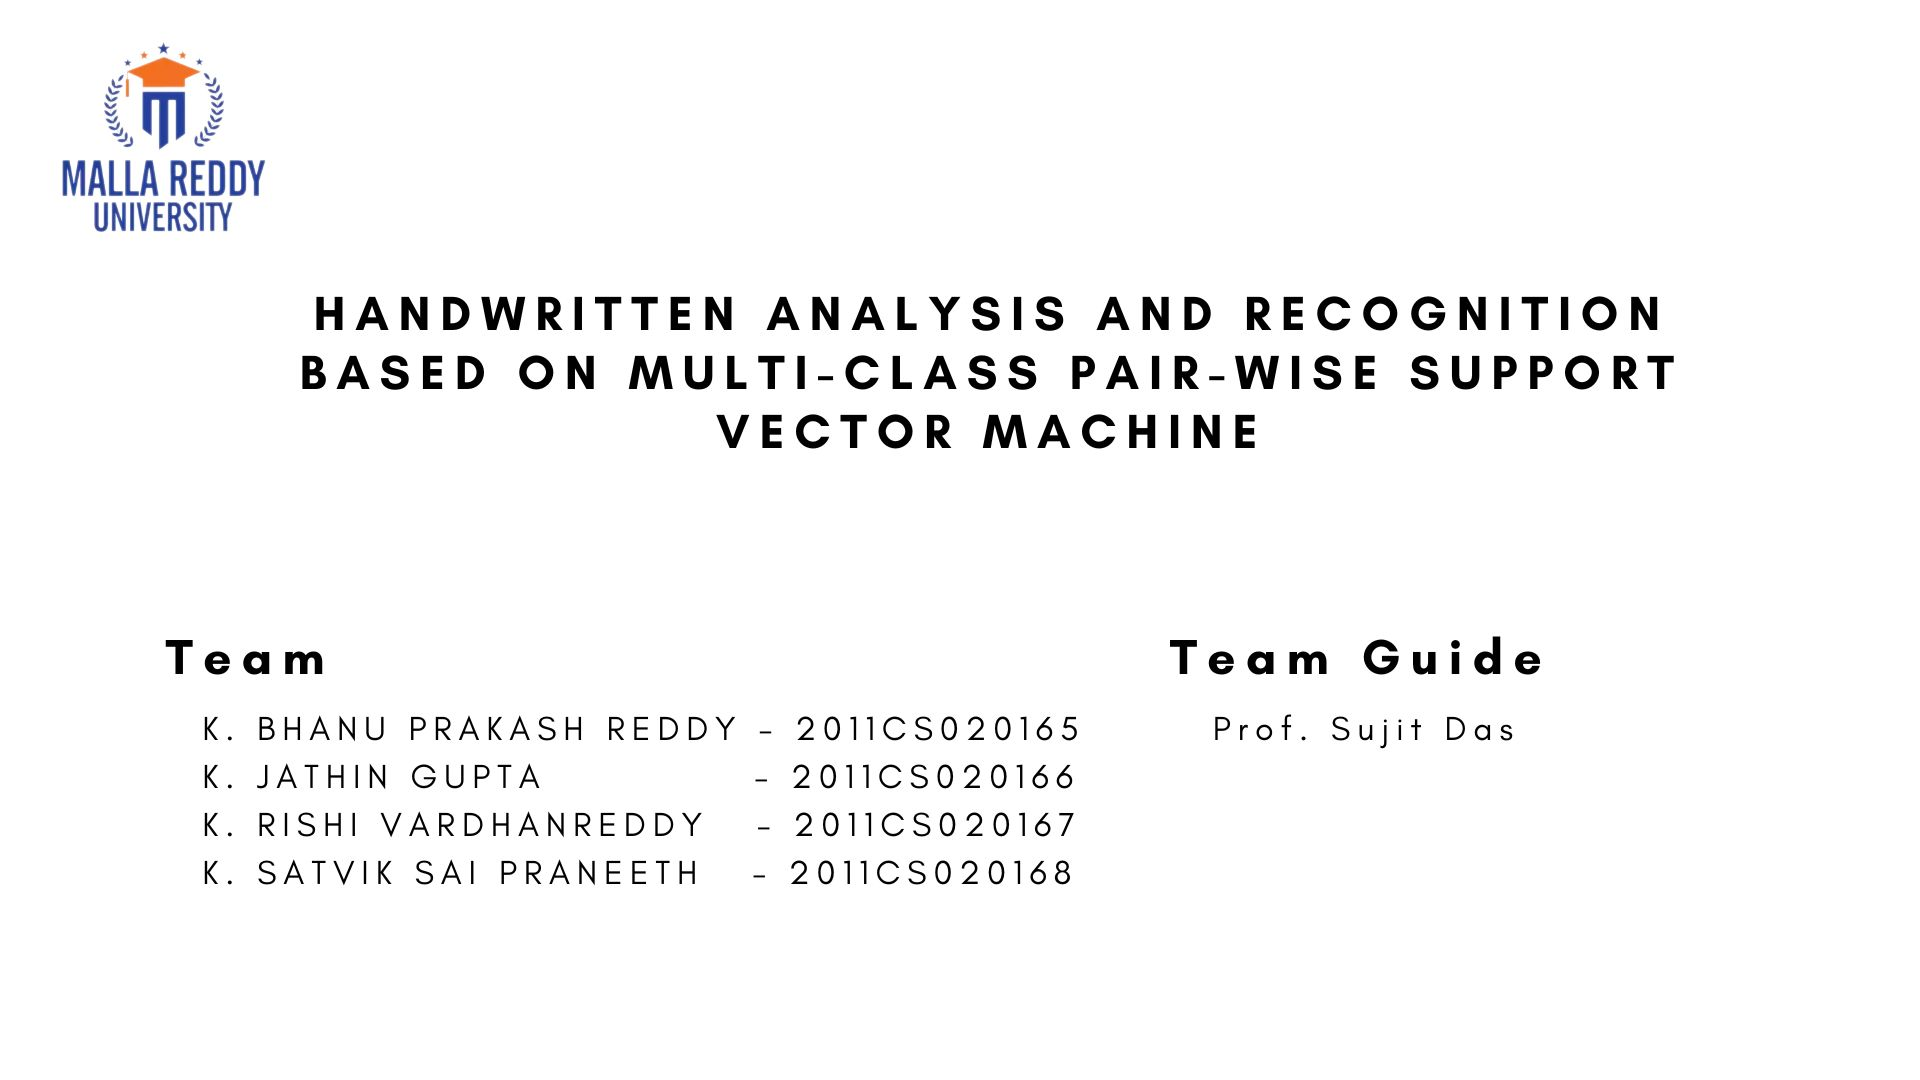



## Import Libraries 

In [2]:
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load the dataset

In [3]:
#  Load and preprocess the data
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

In [4]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.data.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

## Data Preprocessing 

### Mean Imputation

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(mnist.data)

imputed_data = imputer.transform(mnist.data.values)

print(imputed_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
knn = KNNImputer(n_neighbors=2, add_indicator=True)
knn.fit(mnist.data)
knn.transform(mnist.data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
#  Preprocess the images
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
#  Apply dimensionality reduction using PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [13]:
#Train the multiclass pairwise SVM classifier
svm = OneVsOneClassifier(SVC(kernel='linear'))
svm.fit(X_train_pca, y_train)
#  Predict the labels for the test set
y_pred = svm.predict(X_test_pca)
# Evaluate the accuracy of the classifier
acc0 = accuracy_score(y_test, y_pred)
print("Accuracy:", acc0)

Accuracy: 0.9274285714285714


## Classifiers 

### Logistic Regression

In [14]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
print(y_pred)
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")


[8 4 5 ... 2 7 1]
Accuracy score: 0.9066428571428572


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XG boost

In [15]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)
print(f"By XG Boost classifier Acc: {acc2}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:46:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
By XG Boost classifier Acc: 0.9780714285714286


### Gauss Naive Bayes 

In [16]:
classifier = GaussianNB()
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc3}")

Accuracy score : 0.7146428571428571


### Decision Tree Classification

In [17]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

Accuracy score: 0.8502857142857143


### Random Forest

In [18]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification accuracy: {acc5}")

Random Forest Classification accuracy: 0.9466428571428571


## Deep Learning Technique CNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [21]:
X_train_cnn = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_scaled.reshape(-1, 28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_data=(X_test_cnn, y_test))

y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=-1)


acc_cnn = accuracy_score(y_test, y_pred_cnn)
print("Accuracy (CNN):", acc_cnn)

Epoch 1/10
438/438 [==============================] - 17s 38ms/step - loss: 0.2262 - accuracy: 0.9364 - val_loss: 0.1395 - val_accuracy: 0.9644
Epoch 2/10
438/438 [==============================] - 17s 39ms/step - loss: 0.0828 - accuracy: 0.9759 - val_loss: 0.0994 - val_accuracy: 0.9734
Epoch 3/10
438/438 [==============================] - 16s 36ms/step - loss: 0.0562 - accuracy: 0.9837 - val_loss: 0.1073 - val_accuracy: 0.9788
Epoch 4/10
438/438 [==============================] - 16s 37ms/step - loss: 0.0424 - accuracy: 0.9883 - val_loss: 0.1201 - val_accuracy: 0.9755
Epoch 5/10
438/438 [==============================] - 16s 36ms/step - loss: 0.0336 - accuracy: 0.9914 - val_loss: 0.0881 - val_accuracy: 0.9806
Epoch 6/10
438/438 [==============================] - 16s 36ms/step - loss: 0.0289 - accuracy: 0.9924 - val_loss: 0.0988 - val_accuracy: 0.9811
Epoch 7/10
438/438 [==============================] - 15s 35ms/step - loss: 0.0221 - accuracy: 0.9945 - val_loss: 0.1155 - val_accuracy:

## Creating visualization of the models

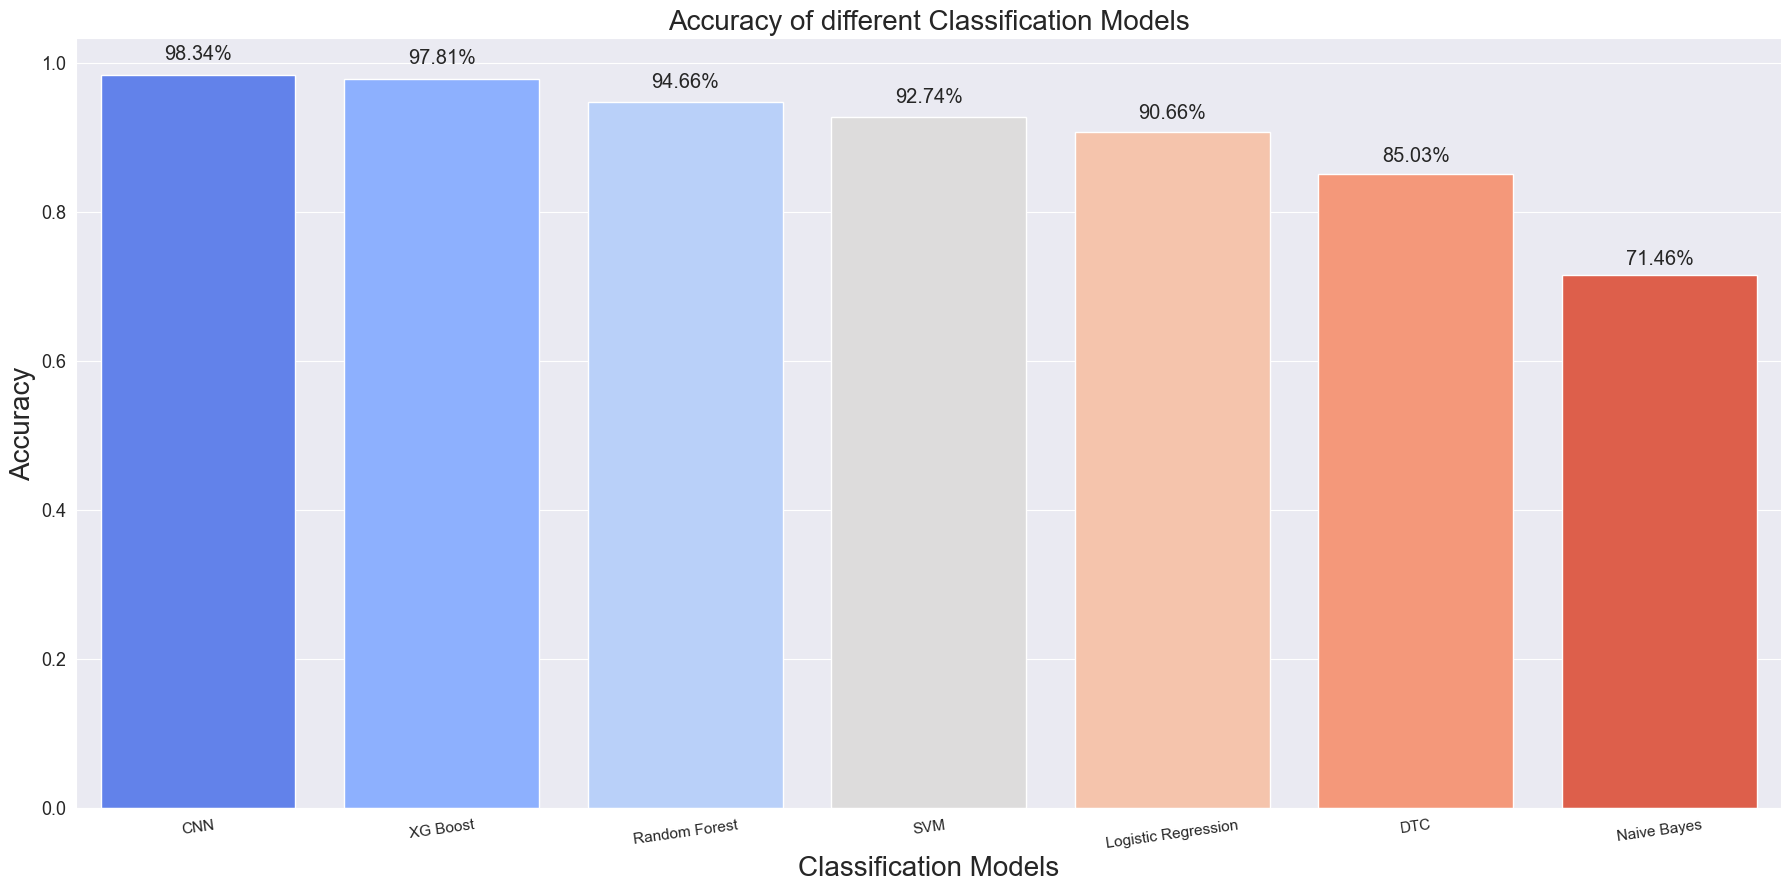

In [36]:
mylist=[]
mylist2=[]
mylist.append(acc_cnn)
mylist2.append("CNN")
mylist.append(acc2)
mylist2.append("XG Boost")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc0)
mylist2.append("SVM")
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc4)
mylist2.append("DTC")
mylist.append(acc3)
mylist2.append("Naive Bayes")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()